In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 5
import yfinance as yf

In [ ]:
result = yf.download('^NSEI', start = "2000-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
def DONCHIAN(hi, lo, n):
    hi = pd.Series(hi)
    lo = pd.Series(lo)
    uc = hi.rolling(n, min_periods=n).max()
    lc = lo.rolling(n, min_periods=n).min()
    mc = (uc + lc) / 2
    return lc, mc, uc
tf = DONCHIAN(result.High, result.Low, 20)
nf = pd.DataFrame(tf)
nf = nf.T
nf = nf.rename(columns={'Low':'Donchain_Low','High':'Dochain_High', 'Unnamed 0':'Base_line'})
result = result.Close.to_frame()
result = pd.concat([result, nf.reindex(result.index)], axis=1)
result['MA'] = result.Close.rolling(200).mean()
result = result.dropna()

In [ ]:
result

,Close,Donchain_Low,Base_line,Dochain_High,MA
Date,,,,,
2008-07-07,4030.000000,3848.250000,4264.000000,4679.750000,5210.716744
2008-07-08,3988.550049,3848.250000,4264.000000,4679.750000,5208.186245
2008-07-09,4157.100098,3848.250000,4264.000000,4679.750000,5206.240745
2008-07-10,4162.200195,3848.250000,4264.000000,4679.750000,5203.389995
2008-07-11,4049.000000,3848.250000,4264.000000,4679.750000,5199.897246
...,...,...,...,...,...
2023-04-06,17599.150391,16828.349609,17300.349609,17772.349609,17511.112983
2023-04-10,17624.050781,16828.349609,17300.349609,17772.349609,17522.765737
2023-04-11,17722.300781,16828.349609,17288.549805,17748.750000,17534.626489


<Axes: xlabel='Date'>

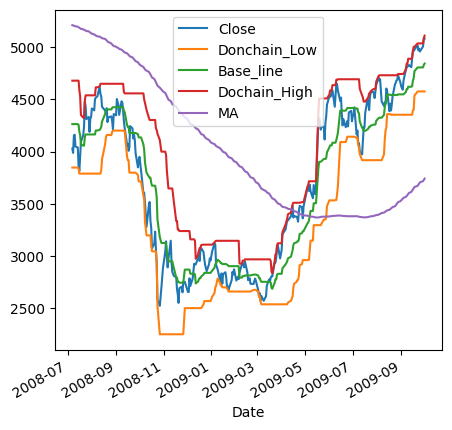

In [ ]:
result[:300].plot()

In [ ]:
# BUY condition
result['signal'] = np.where((result['Close'] > result['MA']) & (result['Close'] > result['Base_line']) & (result['Close'].shift(1) <= result['Base_line']),1,0)
# SELL condition
result['signal'] = np.where((result['Close'] < result['MA']) | ((result['Close'] < result['Base_line']) & (result['Close'].shift(1) >= result['Base_line'])),-1 ,result['signal'])
# creating long and short positions
result['position'] = result['signal'].replace(to_replace=0, method='ffill')
# shifting by 1, to account of close price return calculations
result['position'] = result['position'].shift(1)
result['position'] = result['position'].replace(-1, 0)
# calculating buy and hold strategy returns
result['bnh_returns'] = np.log(result['Close']/result['Close'].shift(1))
# calculating stretegy returns
result['strategy_returns'] = result['bnh_returns'] * (result['position'])

In [ ]:
result

,Close,Donchain_Low,Base_line,Dochain_High,MA,signal,position,bnh_returns,strategy_returns,Change
Date,,,,,,,,,,
2008-07-07,4030.000000,3848.250000,4264.000000,4679.750000,5210.716744,-1,NaN,NaN,NaN,NaN
2008-07-08,3988.550049,3848.250000,4264.000000,4679.750000,5208.186245,-1,0.0,-0.010339,-0.0,NaN
2008-07-09,4157.100098,3848.250000,4264.000000,4679.750000,5206.240745,-1,0.0,0.041390,0.0,0.0
2008-07-10,4162.200195,3848.250000,4264.000000,4679.750000,5203.389995,-1,0.0,0.001226,0.0,0.0
2008-07-11,4049.000000,3848.250000,4264.000000,4679.750000,5199.897246,-1,0.0,-0.027574,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17599.150391,16828.349609,17300.349609,17772.349609,17511.112983,0,0.0,0.002395,0.0,0.0
2023-04-10,17624.050781,16828.349609,17300.349609,17772.349609,17522.765737,0,0.0,0.001414,0.0,0.0
2023-04-11,17722.300781,16828.349609,17288.549805,17748.750000,17534.626489,0,0.0,0.005559,0.0,0.0


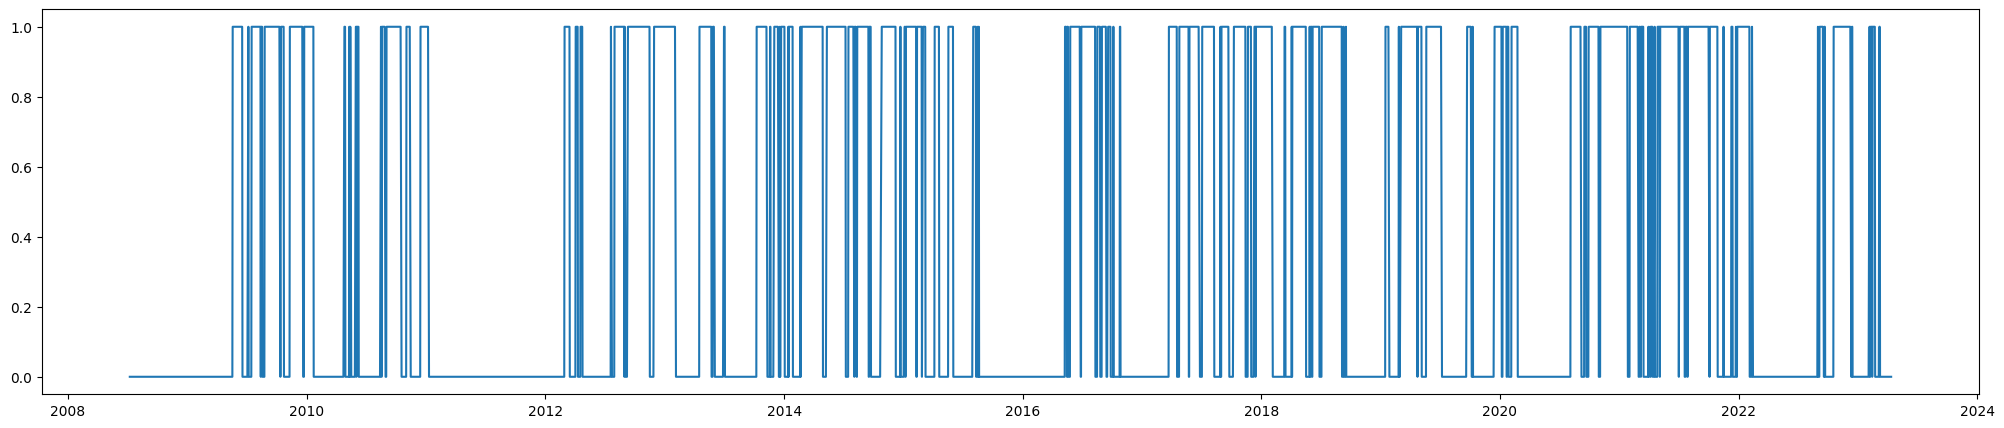

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(result['position'])

Buy and hold returns: 1.4870038791257225
Strategy returns: 1.3354984556740288


<Axes: xlabel='Date'>

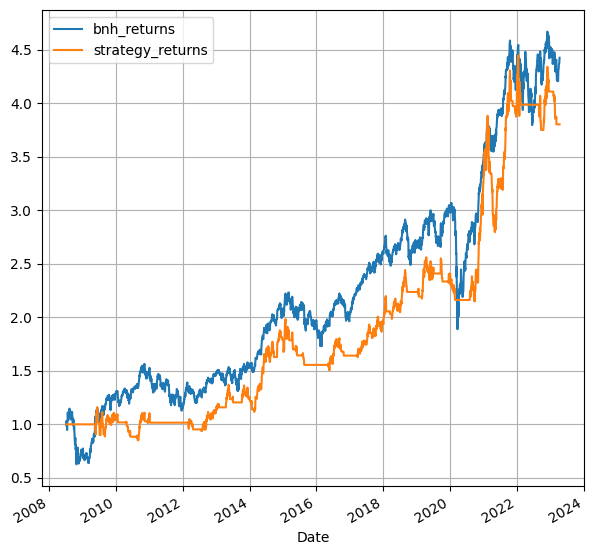

In [ ]:
# comparing buy & hold strategy / bollinger bands strategy returns
print("Buy and hold returns:",result['bnh_returns'].cumsum()[-1])
print("Strategy returns:",result['strategy_returns'].cumsum()[-1])

# plotting strategy historical performance over time
result[['bnh_returns','strategy_returns']] = result[['bnh_returns','strategy_returns']].cumsum().apply(np.exp)
result[['bnh_returns','strategy_returns']].plot(grid=True, figsize=(7, 7))

In [ ]:
result['Change'] = result['position'] - result.position.shift(1)
result

,Close,Donchain_Low,Base_line,Dochain_High,MA,signal,position,bnh_returns,strategy_returns,Change
Date,,,,,,,,,,
2008-07-07,4030.000000,3848.250000,4264.000000,4679.750000,5210.716744,-1,NaN,NaN,NaN,NaN
2008-07-08,3988.550049,3848.250000,4264.000000,4679.750000,5208.186245,-1,0.0,0.989715,1.000000,NaN
2008-07-09,4157.100098,3848.250000,4264.000000,4679.750000,5206.240745,-1,0.0,1.031538,1.000000,0.0
2008-07-10,4162.200195,3848.250000,4264.000000,4679.750000,5203.389995,-1,0.0,1.032804,1.000000,0.0
2008-07-11,4049.000000,3848.250000,4264.000000,4679.750000,5199.897246,-1,0.0,1.004715,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-06,17599.150391,16828.349609,17300.349609,17772.349609,17511.112983,0,0.0,4.367035,3.801891,0.0
2023-04-10,17624.050781,16828.349609,17300.349609,17772.349609,17522.765737,0,0.0,4.373214,3.801891,0.0
2023-04-11,17722.300781,16828.349609,17288.549805,17748.750000,17534.626489,0,0.0,4.397593,3.801891,0.0


In [ ]:
np.count_nonzero(result.Change)

250